Imports

In [1]:
from xml.dom import pulldom
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.metrics import accuracy_score

Part 1: point generation (10000 points (5000 per class), 5% labeled)

In [2]:
# Set up parameters for the L shape
mu1 = np.array([-2, 0])
mu2 = np.array([2, 4])
mu3 = np.array([2, 11])
mu4 = np.array([-2, 7])
sigma1 = np.array([[7, 0], [0, 0.5]])
sigma2 = np.array([[0.5, 0], [0, 4]])  # Modified standard deviation for sample 2
sigma3 = np.array([[7, 0], [0, 0.5]])
sigma4 = np.array([[0.5, 0], [0, 4]])  # Modified standard deviation for sample 4
weights = [0.25, 0.25, 0.25, 0.25]

In [3]:
# Generate random points in the L shape using the Bivariate Gaussian Mixture Distribution
n_points = 1000  # change to 10000
samples1 = np.random.multivariate_normal(mu1, sigma1, int(n_points * weights[0]))
samples2 = np.random.multivariate_normal(mu2, sigma2, int(n_points * weights[1]))
samples3 = np.random.multivariate_normal(mu3, sigma3, int(n_points * weights[2]))
samples4 = np.random.multivariate_normal(mu4, sigma4, int(n_points * weights[3]))

In [4]:
# Assign class labels to the samples
# class1 = np.concatenate((samples2, samples1))
class1 = np.concatenate((samples2, samples1))
class1 = np.c_[class1, np.zeros(len(class1))]
count = 0
true_unlab = []
for i in class1:
    if count == 19:
        count = 0
        i[2] = 1
    else: 
      true_unlab.append(1)
    count += 1

class2 = np.concatenate((samples3, samples4))
class2 = np.c_[class2, np.zeros(len(class2))]
count = 0
for i in class2:
    if count == 19:
        count = 0
        i[2] = -1
    else: 
      true_unlab.append(-1)
    count += 1

# Combine the samples of all three classes
all_samples = np.concatenate((class1, class2))

In [5]:
# Split the samples based on their class label
unlabeled_samples = all_samples[all_samples[:, 2] == 0]
class1_samples = all_samples[all_samples[:, 2] == 1]
class2_samples = all_samples[all_samples[:, 2] == -1]

In [6]:
# Labeled matrix
labeled_samples = np.concatenate((class1_samples, class2_samples))

In [7]:
# Assign random label to unlabeled units
random_unlabeled = np.copy(unlabeled_samples)
random_unlabeled[:, 2] = np.random.choice([-1, 1], size=np.shape(unlabeled_samples)[0], p=[0.5, 0.5])
prova = np.copy(random_unlabeled[:, 2])

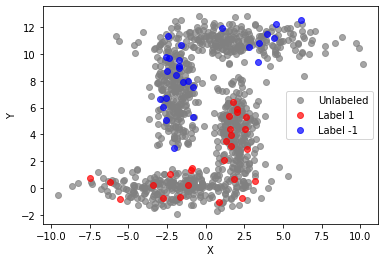

In [10]:
# Plot the samples of each class with a different color and marker
plt.scatter(unlabeled_samples[:, 0], unlabeled_samples[:, 1], color='grey', label='Unlabeled', alpha=0.7)
plt.scatter(class1_samples[:, 0], class1_samples[:, 1], color='red', label='Label 1', alpha=0.7)
plt.scatter(class2_samples[:, 0], class2_samples[:, 1], color='blue', label='Label -1', alpha=0.7)

# Add legend and axis labels
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')

# Show the plot
plt.show()